In [1]:
import pandas as pd
barbie_data = pd.read_csv('barbie_data.csv')


/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_77399/178590665.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


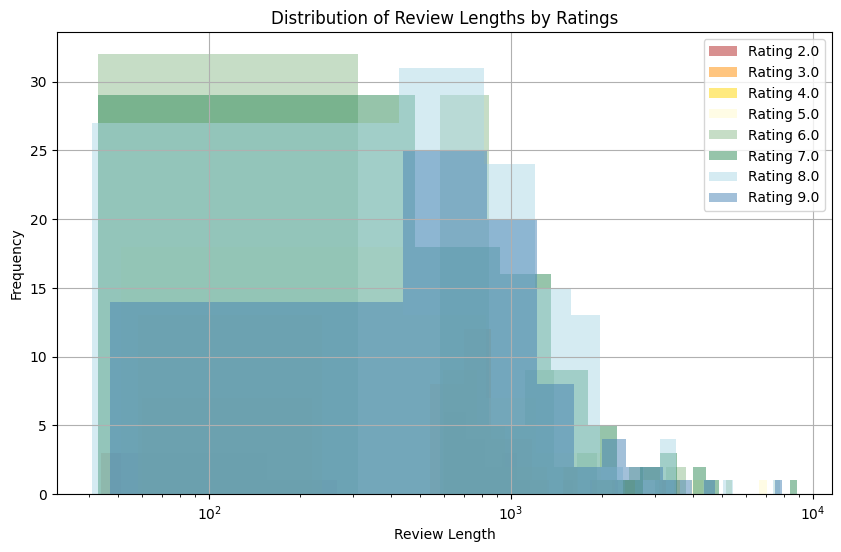

In [2]:
##distribution of review lengths by ratings 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(barbie_data)

#compute length of each review
df['review_length'] = df['text'].apply(len)

# establish color for each rating 
colors = {1: 'darksalmon', 2: 'firebrick', 3: 'darkorange', 4: 'gold', 5: 'lemonchiffon', 6: 'darkseagreen', 7:'seagreen', 8: 'lightblue', 9: 'steelblue'}


plt.figure(figsize=(10, 6))
#create seperate histogram for each rating subsetted by review length  
for rating in sorted(df['rating'].unique()):
    subset = df[df['rating'] == rating]
    plt.hist(subset['review_length'], bins=20, alpha=0.5, label=f'Rating {rating}', color=colors[rating])

plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths by Ratings')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()


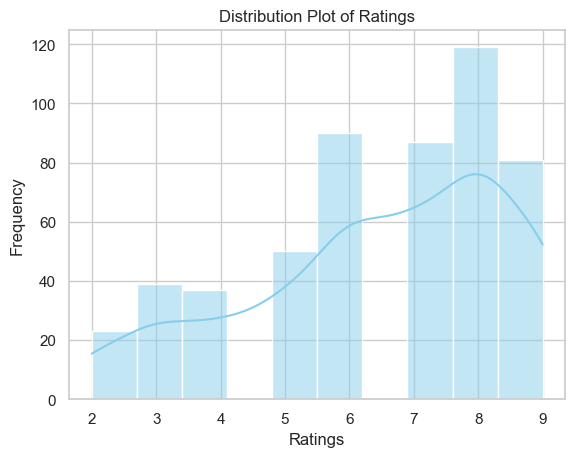

In [3]:
## Distribution of review lengths
ratings_data = barbie_data['rating']

# Create a pandas DataFrame
df = pd.DataFrame({'ratings': ratings_data})

# Create a histogram using Seaborn
sns.set(style="whitegrid")  # Set the style
sns.histplot(df['ratings'], kde=True, bins=10, color='skyblue')  # Create the distribution plot
plt.title('Distribution Plot of Ratings')  # Add title
plt.xlabel('Ratings')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.show()


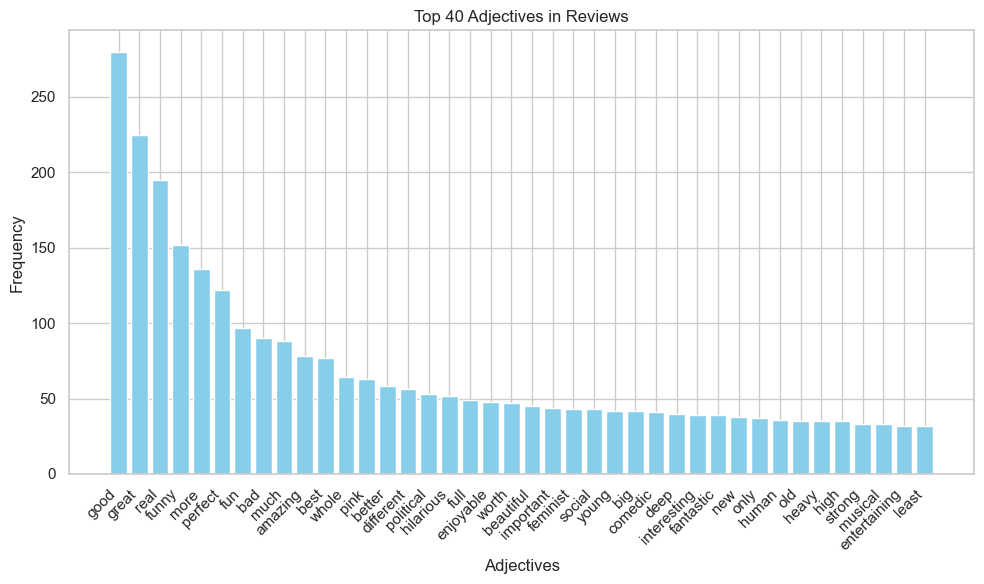

In [4]:
##Plot top 40 most used adjectives in reviews 

import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_sm")

reviews = barbie_data['text']

#remove adjectives that aren't helpful for analysis
words_to_remove = ['other', 'sure', 'first', 'many', 'same', 'own', 'little', 'most', 'few', 'main', 'such']

# Function to extract adjectives from a spacy parsed document
def extract_adjectives(doc):
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() not in words_to_remove]
    return adjectives

# Tokenize each review, parse them using spacy, and extract adjectives
adjectives = []
for review in reviews:
    doc = nlp(review)
    adjectives.extend(extract_adjectives(doc))

# Count the frequency of each adjective
adjective_freq = Counter(adjectives)

top_40_adjectives = dict(adjective_freq.most_common(40))

# Plotting the frequency distribution for the top 20 adjectives
plt.figure(figsize=(10, 6))
plt.bar(top_40_adjectives.keys(), top_40_adjectives.values(), color='skyblue')
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.title('Top 40 Adjectives in Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()